<a href="https://colab.research.google.com/github/serozhenko/Metrics-Analysis/blob/main/python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##[Посилання на дашборд ](https://public.tableau.com/app/profile/viktoriia.serozhenko6318/viz/Project1_17566774474770/Project1?publish=yes)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import auth
from google.cloud import bigquery

In [3]:
auth.authenticate_user()
client = bigquery.Client(project="data-analytics-mate")
query = """
SELECT s.date,
s.ga_session_id,
sp.continent,
sp.country,
sp.device,
sp.browser,
sp.mobile_model_name,
sp.operating_system,
sp.language,
sp.name as traffic,
sp.channel,
a.id as id_account,
a.is_verified,
a.is_unsubscribed,
p.category,
p.name as name_product,
p.price,
p.short_description
FROM `data-analytics-mate.DA.session` s
join `data-analytics-mate.DA.session_params` sp
on s.ga_session_id = sp.ga_session_id
left join `data-analytics-mate.DA.account_session` acs
on s.ga_session_id = acs.ga_session_id
left join `data-analytics-mate.DA.account` a
on acs.account_id = a.id
left join `data-analytics-mate.DA.order` o
on s.ga_session_id = o.ga_session_id
left join `data-analytics-mate.DA.product` p
on o.item_id = p.item_id
"""
query_job = client.query(query)
results = query_job.result()

df = results.to_dataframe()

df

,date,ga_session_id,continent,country,device,browser,mobile_model_name,operating_system,language,traffic,channel,id_account,is_verified,is_unsubscribed,category,name_product,price,short_description
0,2021-01-19,7268004754,(not set),(not set),desktop,Chrome,Chrome,Web,en-gb,(direct),Direct,<NA>,<NA>,<NA>,None,None,NaN,None
1,2021-01-06,8321293308,(not set),(not set),desktop,Chrome,Chrome,Web,None,(direct),Direct,<NA>,<NA>,<NA>,None,None,NaN,None
2,2020-11-05,4392362373,(not set),(not set),desktop,Chrome,Chrome,Web,None,(organic),Organic Search,<NA>,<NA>,<NA>,None,None,NaN,None
3,2020-12-09,140108698,(not set),(not set),desktop,Chrome,Safari,Web,en-us,(direct),Direct,<NA>,<NA>,<NA>,None,None,NaN,None
4,2020-11-10,8351127264,(not set),(not set),mobile,Safari,iPhone,Web,en-us,(organic),Organic Search,<NA>,<NA>,<NA>,None,None,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349540,2020-11-25,353517,Americas,Canada,desktop,Chrome,Safari,Macintosh,None,(data deleted),Undefined,<NA>,<NA>,<NA>,None,None,NaN,None
349541,2020-11-09,2536581233,Americas,United States,desktop,Chrome,Safari,Macintosh,None,(data deleted),Undefined,<NA>,<NA>,<NA>,None,None,NaN,None
349542,2021-01-02,2149190429,Americas,Canada,desktop,Chrome,Safari,Macintosh,de,(data deleted),Undefined,<NA>,<NA>,<NA>,None,None,NaN,None
349543,2021-01-08,6004211753,Americas,United States,desktop,Chrome,Safari,Macintosh,None,(data deleted),Undefined,<NA>,<NA>,<NA>,None,None,NaN,None


In [4]:
#Конвертуємо у таблиці стовпець Date до формату datetime
df["date"] = pd.to_datetime(df["date"])

In [5]:
#Короткий опис отриманого датасету
print(f"Загальна кількість колонок:{df.shape[1]}")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Кількість числових колонок:", len(numeric_cols))
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Кількість категоріальних колонок:", len(categorical_cols))
datetime_cols = df.select_dtypes(include=['datetime64[ns]']).columns
print("Кількість datetime колонок:", len(datetime_cols))
print(f"Кількість унікальних сесій:{df['ga_session_id'].nunique()}")
print("Пропущені значення у data:")
print(df.isna().sum())
print(f"Подивимось долю пропущених значень у відсотках: \n{(df.isna().sum() / df.shape[0]) * 100}")

Загальна кількість колонок:18
Кількість числових колонок: 5
Кількість категоріальних колонок: 12
Кількість datetime колонок: 1
Кількість унікальних сесій:349545
Пропущені значення у data:
date                      0
ga_session_id             0
continent                 0
country                   0
device                    0
browser                   0
mobile_model_name         0
operating_system          0
language             114266
traffic                   0
channel                   0
id_account           321600
is_verified          321600
is_unsubscribed      321600
category             316007
name_product         316007
price                316007
short_description    316007
dtype: int64
Подивимось долю пропущених значень у відсотках: 
date                  0.000000
ga_session_id         0.000000
continent             0.000000
country               0.000000
device                0.000000
browser               0.000000
mobile_model_name     0.000000
operating_system      0.00000

In [6]:
#Перевіряємо чи є дублікатиу нашому дата сеті
duplicate_rows_df = df.duplicated()
print(duplicate_rows_df)
print(duplicate_rows_df.sum())

0         False
1         False
2         False
3         False
4         False
          ...  
349540    False
349541    False
349542    False
349543    False
349544    False
Length: 349545, dtype: bool
0


In [7]:
#Основні метрики
print(f"Кількість країн у таблиці: {df["country"].nunique()}")
print(f"Кількість контитентів у таблиці: {df["continent"].nunique()}")
print(f"Загальний прибуток: ${df["price"].sum():.2f}")

Кількість країн у таблиці: 108
Кількість контитентів у таблиці: 6
Загальний прибуток: $31971731.10


In [8]:
#Основний аналіз набору даних
sales_by_continent = df.groupby("continent")["price"].sum()
top3_continent = sales_by_continent.sort_values(ascending=False).head(3)
print(f"Топ 3 континентів по продажам:\n{top3_continent}")

sales_by_country = df.groupby("country")["price"].sum()
top5_country = sales_by_country.sort_values(ascending=False).head(5)
print(f"Топ 5 країн по продажам:\n{top5_country}")

sales_by_category = df.groupby("category")["price"].sum()
top10_category = sales_by_category.sort_values(ascending=False).head(10)
print(f"Топ 10 категорій по продажам:\n{top10_category}")

Топ 3 континентів по продажам:
continent
Americas    17665280.0
Asia         7601298.3
Europe       5934624.2
Name: price, dtype: float64
Топ 5 країн по продажам:
country
United States     13943553.9
India              2809762.0
Canada             2437921.0
United Kingdom      938317.9
France              710692.8
Name: price, dtype: float64
Топ 10 категорій по продажам:
category
Sofas & armchairs                   8388254.5
Chairs                              6147748.8
Beds                                4919725.0
Bookcases & shelving units          3640818.1
Cabinets & cupboards                2336499.5
Outdoor furniture                   2142222.2
Tables & desks                      1790307.5
Chests of drawers & drawer units     906562.5
Bar furniture                        735503.0
Children's furniture                 467697.0
Name: price, dtype: float64


In [9]:
top_country_categories = (df[df["country"] == "United States"].groupby("category")["price"].sum().sort_values(ascending=False).head(10))

print(f"Топ-10 категорій у United States:\n{top_country_categories}")

Топ-10 категорій у United States:
category
Sofas & armchairs                   3707144.5
Chairs                              2619773.8
Beds                                2213058.0
Bookcases & shelving units          1567606.9
Cabinets & cupboards                 994545.5
Outdoor furniture                    929245.2
Tables & desks                       777865.0
Chests of drawers & drawer units     382388.0
Bar furniture                        330805.0
Children's furniture                 207575.0
Name: price, dtype: float64


In [10]:
#Відсоток продажів у розрізі моделей девайсів
total_price = df["price"].sum()
sales_by_model = df.groupby("mobile_model_name")["price"].sum().sort_values(ascending=False)
sales_by_model_percent = 100 * sales_by_model / total_price
print(f"Відсоток продажів у розрізі моделей девайсів:\n{sales_by_model_percent}")

#Відсоток продажів у типів девайсу
sales_by_type = df.groupby("device")["price"].sum().sort_values(ascending=False)
sales_by_type_percent = 100 * sales_by_type / total_price
print(f"Відсоток продажів у типів девайсу:\n{sales_by_type_percent}")


Відсоток продажів у розрізі моделей девайсів:
mobile_model_name
Chrome        27.835602
<Other>       20.440966
Safari        20.302504
iPhone        20.082667
ChromeBook     5.725241
Edge           2.180746
iPad           1.403910
Firefox        1.316998
Pixel 4 XL     0.369976
Pixel 3        0.341390
Name: price, dtype: float64
Відсоток продажів у типів девайсу:
device
desktop    59.002245
mobile     38.734924
tablet      2.262831
Name: price, dtype: float64


In [11]:
#Підраховуємо кількість унікальних сесій та акаунтів
count_of_unique_sessions = df["ga_session_id"].nunique()
count_of_unique_accounts = df["id_account"].nunique()
print(f"Кількість унікальних сесій: {count_of_unique_sessions}")
print(f"Кількість унікальних акаунтів: {count_of_unique_accounts}")

#Підраховуємо кількість унікальних акаунтів які підтвердили email
count_of_verified_accounts = df[df["is_verified"] == 1]["id_account"].nunique()
count_of_unverified_accounts = df[df["is_verified"] == 0]["id_account"].nunique()
print(f"Кількість акаунтів які підтвердили email: {count_of_unique_sessions}")
print(f"Кількість акаунтів які не підтвердили email: {count_of_unique_accounts}")

#Підраховуємо кількість підписаних та відписаних акаунтів
count_of_subscribed_accounts = df[df["is_unsubscribed"] == 0]["id_account"].nunique()
count_of_unsubscribed_accounts = df[df["is_unsubscribed"] == 1]["id_account"].nunique()
print(f"Кількість акаунтів які підписані: {count_of_unique_sessions}")
print(f"Кількість акаунтів які відписались: {count_of_unique_accounts}")

Кількість унікальних сесій: 349545
Кількість унікальних акаунтів: 27945
Кількість акаунтів які підтвердили email: 349545
Кількість акаунтів які не підтвердили email: 27945
Кількість акаунтів які підписані: 349545
Кількість акаунтів які відписались: 27945


In [12]:
#Підрахуємо відсоток відписаних акаунтів
unsubscribed_accounts = 100 * count_of_unsubscribed_accounts / count_of_unique_accounts
percent_of_unsubscribed_accounts = round(unsubscribed_accounts, 2)
print(f"Відсоток відписаних акаунтів: %{percent_of_unsubscribed_accounts}")

#Підрахуємо відсоток писаних акаунтів
subscribed_accounts = 100 * count_of_subscribed_accounts / count_of_unique_accounts
percent_of_subscribed_accounts = round(subscribed_accounts, 2)
print(f"Відсоток відписаних акаунтів: %{percent_of_subscribed_accounts}")

Відсоток відписаних акаунтів: %16.94
Відсоток відписаних акаунтів: %83.06


In [13]:
#В якій країні найбільше зареєстрованих користвучів
top_country_accounts = (df[df["is_verified"] == 1].groupby("country")["id_account"].count().sort_values(ascending=False).head(10))
print(top_country_accounts)

country
United States     8889
India             1927
Canada            1486
United Kingdom     601
France             388
Spain              380
Taiwan             348
Germany            345
China              344
Italy              285
Name: id_account, dtype: Int64


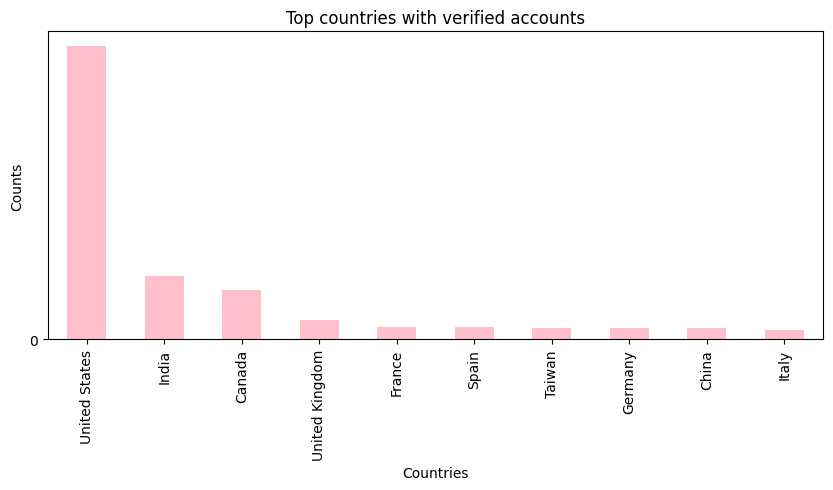

In [14]:
plt.figure(figsize=(10, 4))
top_country_accounts.plot(kind="bar", color="pink")
y_ticks = np.arange(0, top_country_accounts.max() + 100, 50000000)
plt.yticks(y_ticks)
plt.title("Top countries with verified accounts")
plt.xlabel("Countries")
plt.ylabel("Counts")
plt.show()

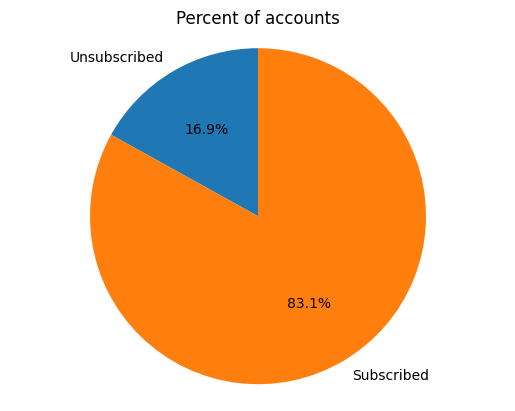

In [15]:
sizes = [unsubscribed_accounts, subscribed_accounts]
labels = ["Unsubscribed", "Subscribed"]

plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Percent of accounts")
plt.axis("equal")
plt.show()

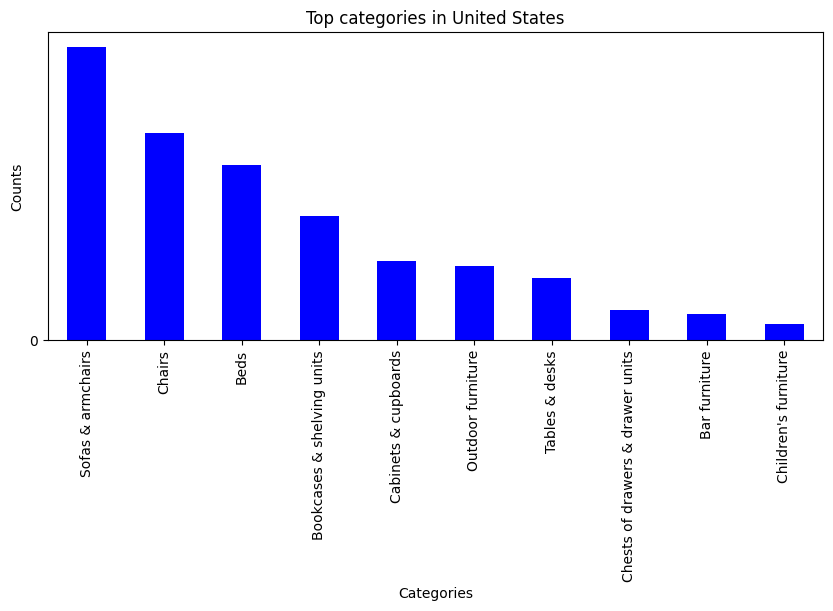

In [16]:
plt.figure(figsize=(10, 4))
top_country_categories.plot(kind="bar", color="blue")
y_ticks = np.arange(0, top_country_categories.max() + 100, 50000000)
plt.yticks(y_ticks)
plt.title("Top categories in United States")
plt.xlabel("Categories")
plt.ylabel("Counts")
plt.show()

In [17]:
#Створюємо колонку day для групування по місяцях
df["day"] = pd.to_datetime(df["date"])
df

,date,ga_session_id,continent,country,device,browser,mobile_model_name,operating_system,language,traffic,channel,id_account,is_verified,is_unsubscribed,category,name_product,price,short_description,day
0,2021-01-19,7268004754,(not set),(not set),desktop,Chrome,Chrome,Web,en-gb,(direct),Direct,<NA>,<NA>,<NA>,None,None,NaN,None,2021-01-19
1,2021-01-06,8321293308,(not set),(not set),desktop,Chrome,Chrome,Web,None,(direct),Direct,<NA>,<NA>,<NA>,None,None,NaN,None,2021-01-06
2,2020-11-05,4392362373,(not set),(not set),desktop,Chrome,Chrome,Web,None,(organic),Organic Search,<NA>,<NA>,<NA>,None,None,NaN,None,2020-11-05
3,2020-12-09,140108698,(not set),(not set),desktop,Chrome,Safari,Web,en-us,(direct),Direct,<NA>,<NA>,<NA>,None,None,NaN,None,2020-12-09
4,2020-11-10,8351127264,(not set),(not set),mobile,Safari,iPhone,Web,en-us,(organic),Organic Search,<NA>,<NA>,<NA>,None,None,NaN,None,2020-11-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349540,2020-11-25,353517,Americas,Canada,desktop,Chrome,Safari,Macintosh,None,(data deleted),Undefined,<NA>,<NA>,<NA>,None,None,NaN,None,2020-11-25
349541,2020-11-09,2536581233,Americas,United States,desktop,Chrome,Safari,Macintosh,None,(data deleted),Undefined,<NA>,<NA>,<NA>,None,None,NaN,None,2020-11-09
349542,2021-01-02,2149190429,Americas,Canada,desktop,Chrome,Safari,Macintosh,de,(data deleted),Undefined,<NA>,<NA>,<NA>,None,None,NaN,None,2021-01-02
349543,2021-01-08,6004211753,Americas,United States,desktop,Chrome,Safari,Macintosh,None,(data deleted),Undefined,<NA>,<NA>,<NA>,None,None,NaN,None,2021-01-08


/tmp/ipython-input-4067695099.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


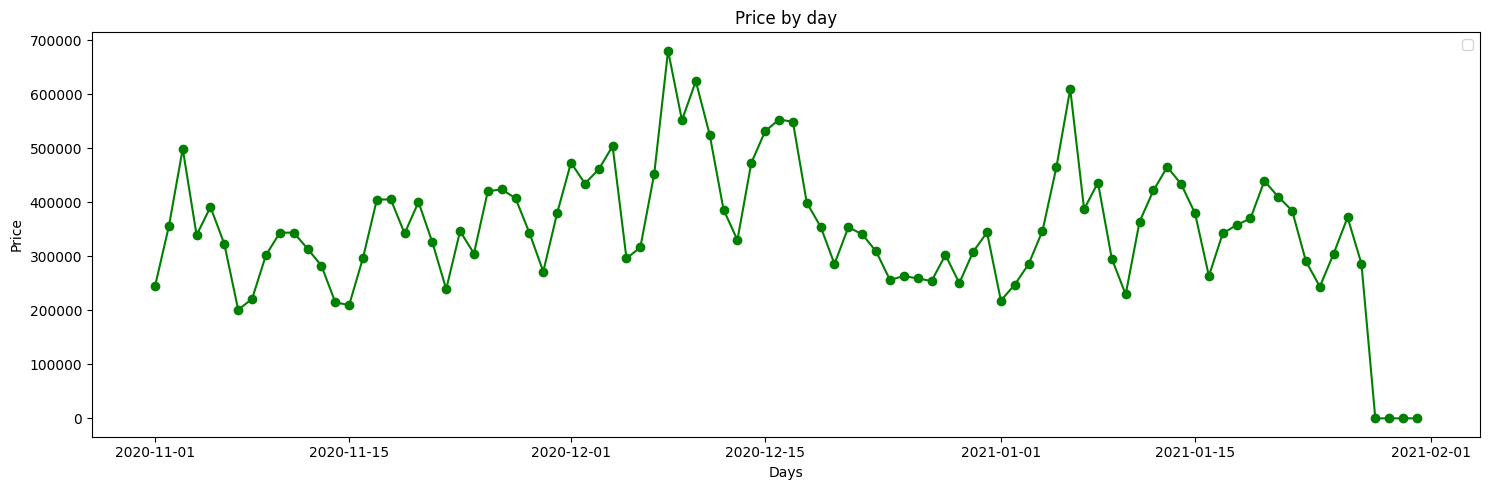

In [18]:
#Знайдемо загальні продажі за кожний місяць
price_by_day = df.groupby("day")["price"].sum()

plt.figure(figsize=(15, 5))
plt.plot(price_by_day.index, price_by_day.values, color="green", marker="o")
plt.title("Price by day")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()


Як ми можемо побачити що найбільше продажів у першій половині грудня що може свідчити що перед Новим роком збільшуються продажі.

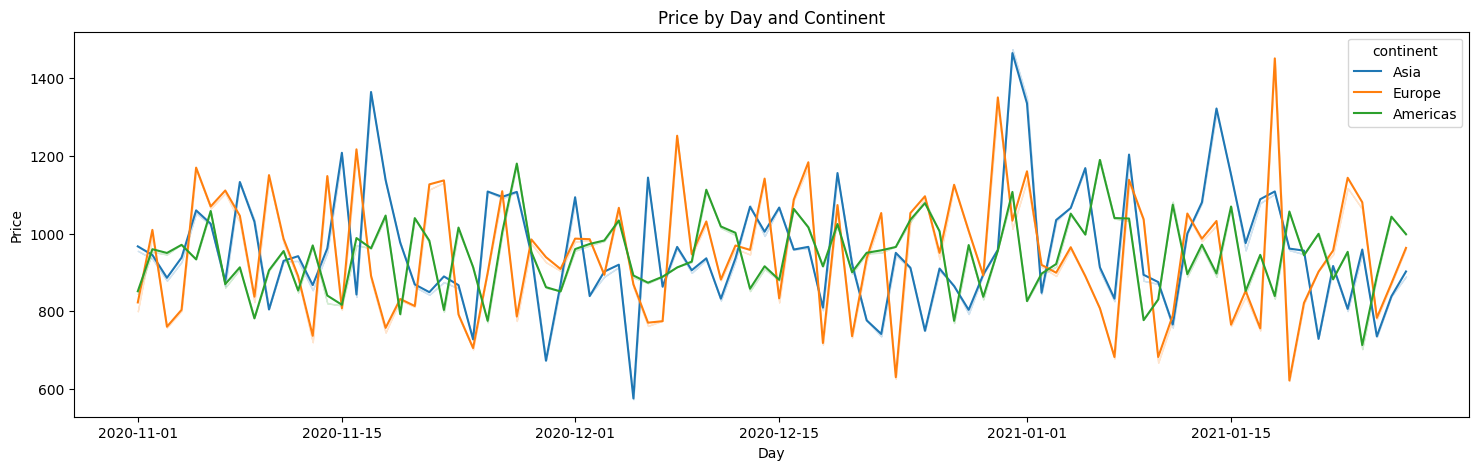

In [19]:
df_filtered = df[df["continent"].isin(["Europe", "Asia", "Americas"])]
plt.figure(figsize=(18, 5))
sns.lineplot(data=df_filtered, x="day", y="price", hue="continent", errorbar=("ci", False))
plt.title("Price by Day and Continent")
plt.xlabel("Day")
plt.ylabel("Price")
plt.show()


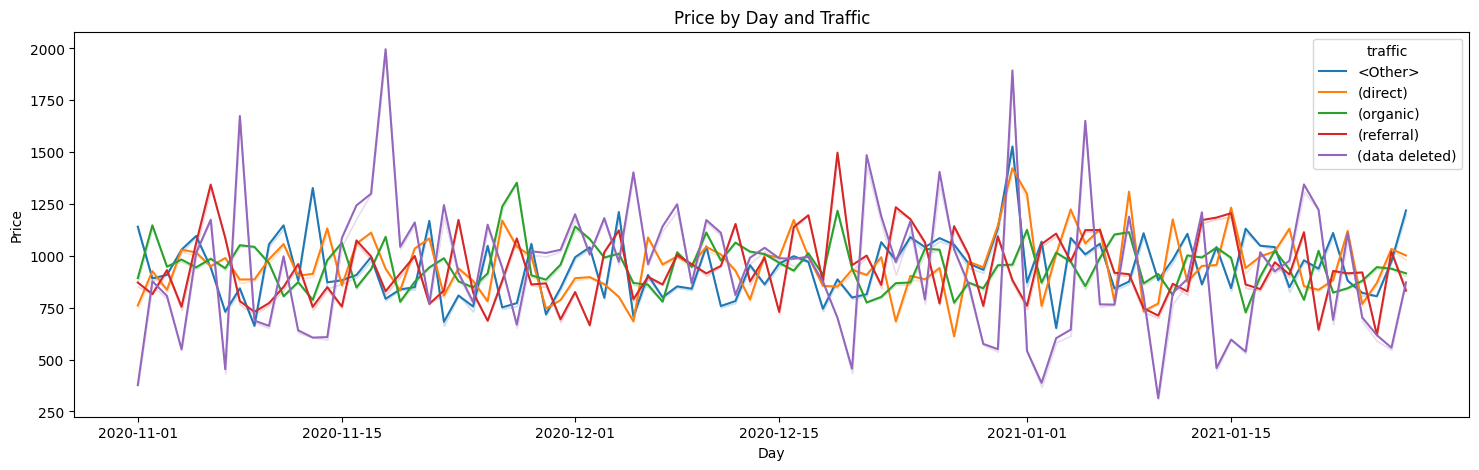

In [20]:
plt.figure(figsize=(18, 5))
sns.lineplot(data=df_filtered, x="day", y="price", hue="traffic", errorbar=("ci", False))
plt.title("Price by Day and Traffic")
plt.xlabel("Day")
plt.ylabel("Price")
plt.show()


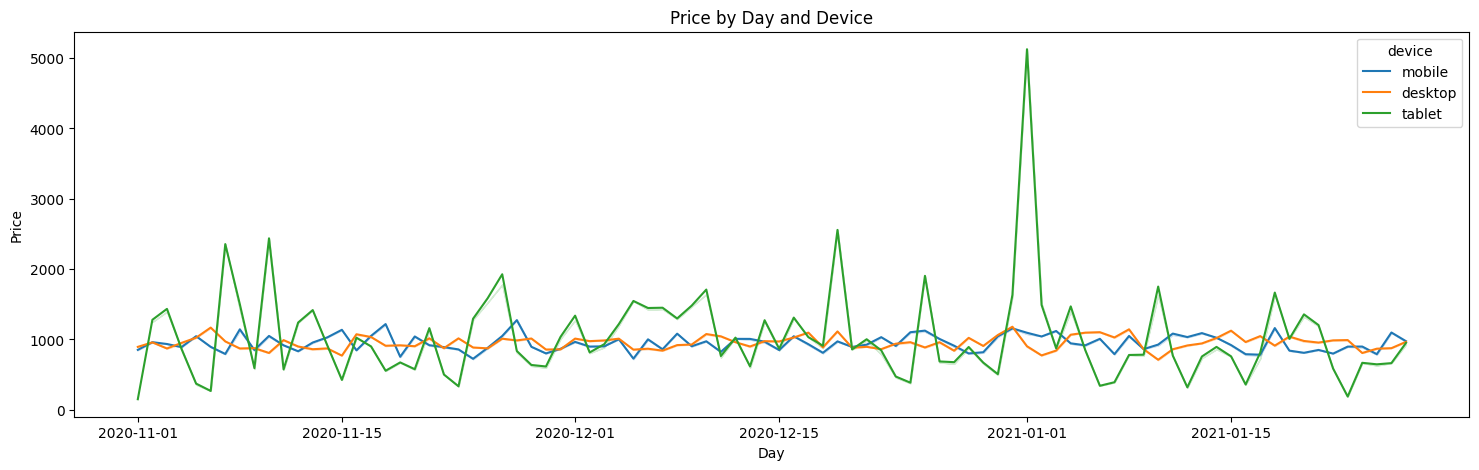

In [21]:
plt.figure(figsize=(18, 5))
sns.lineplot(data=df_filtered, x="day", y="price", hue="device", errorbar=("ci", False))
plt.title("Price by Day and Device")
plt.xlabel("Day")
plt.ylabel("Price")
plt.show()

In [22]:
#кількість сесій у розрізі каналів трафіку та типів девайсів
pivot_table_traffic = pd.pivot_table(df, values="ga_session_id", index = "device", columns="traffic", aggfunc=["count"])
pivot_table_traffic

count                                      
traffic (data deleted) (direct) (organic) (referral) <Other>
device                                                      
desktop          12497    47825     69431      35890   38786
mobile            8448    31745     46934      24183   25957
tablet             469     1812      2659       1363    1546

In [23]:
# продажі за категоріями товарів (топ-10 категорій) у різних країнах (топ-5 країн)
top_categories = df.groupby("category")["price"].sum().nlargest(10).index
top_countries = df.groupby("country")["price"].sum().nlargest(5).index

df_filtered = df[df["category"].isin(top_categories) & df["country"].isin(top_countries)]

pivot_table_cat = pd.pivot_table(df_filtered,values="price",index="category", columns="country", aggfunc="sum", fill_value=0)

pivot_table_cat = pivot_table_cat.loc[pivot_table_cat.sum(axis=1).sort_values(ascending=False).index]

pivot_table_cat

country,Canada,France,India,United Kingdom,United States
category,,,,,
Sofas & armchairs,692427.5,187735.0,788430.0,234812.0,3707144.5
Chairs,417740.8,134029.4,544309.2,188519.4,2619773.8
Beds,354772.0,116414.0,358319.5,133816.0,2213058.0
Bookcases & shelving units,278981.9,73830.0,364507.4,113987.6,1567606.9
Cabinets & cupboards,181802.0,59101.5,191888.0,71684.5,994545.5
Outdoor furniture,185322.8,40486.4,162289.4,57002.4,929245.2
Tables & desks,132678.0,42299.0,186157.5,49374.0,777865.0
Chests of drawers & drawer units,71952.0,21544.5,73111.0,36784.0,382388.0
Bar furniture,51724.0,11199.0,57657.0,22103.0,330805.0


In [24]:
## продажі за категоріями товарів (топ-10 категорій) у різних континентах (топ-3 континента)
top_categories = df.groupby("category")["price"].sum().nlargest(10).index
top_continent = df.groupby("continent")["price"].sum().nlargest(3).index

df_filtered = df[df["category"].isin(top_categories) & df["continent"].isin(top_continent)]

pivot_table_con = pd.pivot_table(df_filtered,values="price",index="category", columns="continent", aggfunc="sum", fill_value=0)

pivot_table_con = pivot_table_con.loc[pivot_table_con.sum(axis=1).sort_values(ascending=False).index]

pivot_table_con

continent,Americas,Asia,Europe
category,,,
Sofas & armchairs,4737307.0,1950022.0,1491224.5
Chairs,3309203.0,1524600.8,1178581.0
Beds,2773094.0,1077325.5,925047.5
Bookcases & shelving units,1968919.3,945368.9,650889.5
Cabinets & cupboards,1275562.5,545369.5,468652.5
Outdoor furniture,1213115.2,488607.6,399553.2
Tables & desks,968129.0,464192.5,307045.0
Chests of drawers & drawer units,484290.0,210383.5,186793.0
Bar furniture,406198.0,176684.0,131110.0


In [25]:
#кількість сесій у розрізі каналів трафіку та моделів девайсів
pivot_table_model = pd.pivot_table(df, values="ga_session_id", index = "mobile_model_name", columns="traffic", aggfunc=["count"])
pivot_table_model

count                                      
traffic           (data deleted) (direct) (organic) (referral) <Other>
mobile_model_name                                                     
<Other>                     4434    16361     24010      12502   13532
Chrome                      5951    22901     32976      17053   18373
ChromeBook                  1176     4392      6680       3306    3530
Edge                         492     1853      2672       1334    1556
Firefox                      323     1149      1630        836     936
Pixel 3                       64      236       358        181     195
Pixel 4 XL                    90      295       450        187     224
Safari                      4281    16459     23990      12614   13547
iPad                         285     1170      1741        882    1012
iPhone                      4318    16566     24517      12541   13384

#Статистичний аналіз взаємозв’язків

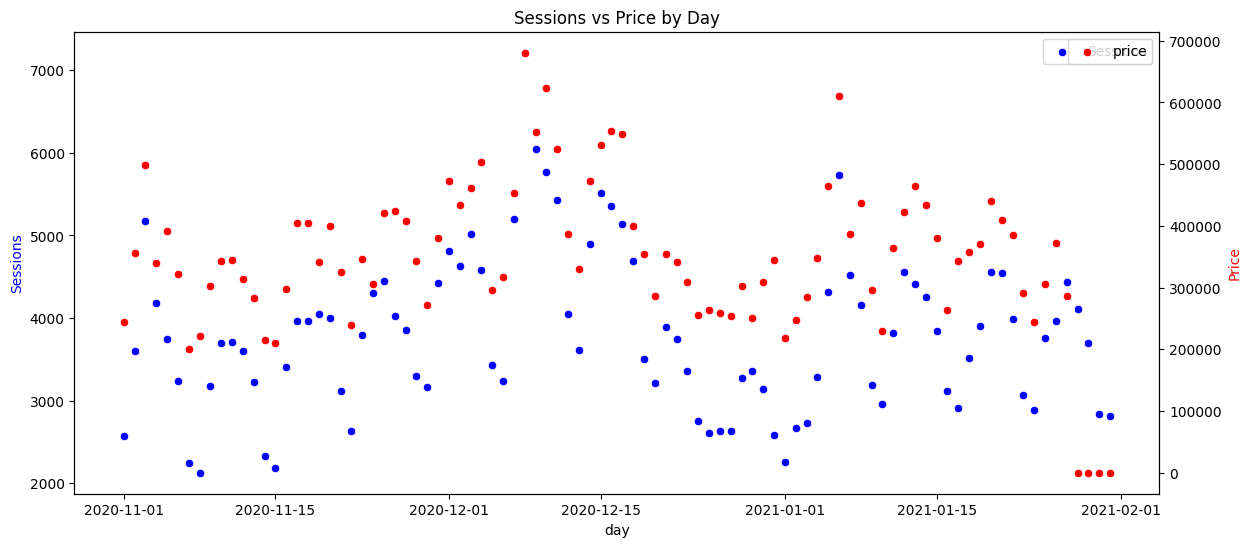

In [26]:
from scipy.stats import pearsonr

daily_stats = df.groupby("day").agg(sessions=("ga_session_id", "count"),price=("price", "sum")).reset_index()

fig, ax1 = plt.subplots(figsize=(14,6))
ax2 = ax1.twinx()
sns.scatterplot(data=daily_stats, x="day", y="sessions", ax=ax1, color="blue", label="Sessions")
sns.scatterplot(data=daily_stats, x="day", y="price", ax=ax2, color="red", label="price")
ax1.set_ylabel("Sessions", color="blue")
ax2.set_ylabel("Price", color="red")
ax1.set_title("Sessions vs Price by Day")

plt.show()

In [27]:
from scipy.stats import kendalltau

#Розраховуємо кореляцію Кендала оскільки у нас є аномалії на графіку
print(f"Test statistic and p-value: {kendalltau(daily_stats["sessions"], daily_stats["price"])}")

kendall_corr = daily_stats["sessions"].corr(daily_stats["price"], method="kendall")
print(f"Kendall Correlation: {kendall_corr}")

Test statistic and p-value: SignificanceResult(statistic=np.float64(0.717666930923723), pvalue=np.float64(4.2515191569599826e-24))
Kendall Correlation: 0.717666930923723


Як ми можемо побачити що результат статистично значущий. За величиною коефіцієнта кореляції, приблизно 0.718, робимо висновок, що метрики мають сильний прямий зв'язок.

In [28]:
from scipy.stats import pearsonr

In [29]:
df_agg_cont = df.groupby(["continent", pd.Grouper(key="date", freq="D")])["price"].sum().unstack(level=0)

# Вибір топ-3 континентів
top_continents = ["Americas", "Europe", "Asia"]
df_filtered = df_agg_cont[top_continents].dropna()

correlation_matrix_cont = df_filtered.corr(method="pearson")
correlation_matrix_cont

continent,Americas,Europe,Asia
continent,,,
Americas,1.000000,0.770586,0.792025
Europe,0.770586,1.000000,0.768427
Asia,0.792025,0.768427,1.000000


In [30]:
corr_americas_asia, p_value_americas_asia = pearsonr(df_filtered["Americas"], df_filtered["Asia"])
corr_americas_europe, p_value_americas_europe = pearsonr(df_filtered["Americas"], df_filtered["Europe"])
corr_asia_europe, p_value_asia_europe = pearsonr(df_filtered["Asia"], df_filtered["Europe"])

# (UA) Виводимо коефіцієнти кореляції та p-value між континентами
# (ENG) Display the correlation coefficients and p-values between continents
print(f"Correlation between price in Americas and Asia: {corr_americas_asia}, p-value: {p_value_americas_asia}")
print(f"Correlation between price in Americas and Europe: {corr_americas_europe}, p-value: {p_value_americas_europe}")
print(f"Correlation between price in Asia and Europe: {corr_asia_europe}, p-value: {p_value_asia_europe}")

Correlation between price in Americas and Asia: 0.7920245629479414, p-value: 5.409189396197475e-21
Correlation between price in Americas and Europe: 0.7705864582886499, p-value: 2.6714492240629956e-19
Correlation between price in Asia and Europe: 0.7684273823164164, p-value: 3.8649460090531196e-19


In [31]:
df_agg_traffic = df.groupby(["traffic", pd.Grouper(key="date", freq="D")])["price"].sum().unstack(level=0)

correlation_matrix = df_agg_traffic.corr(method="pearson")
correlation_matrix

traffic,(data deleted),(direct),(organic),(referral),<Other>
traffic,,,,,
(data deleted),1.000000,0.532887,0.560111,0.560018,0.422452
(direct),0.532887,1.000000,0.820933,0.792201,0.764078
(organic),0.560111,0.820933,1.000000,0.806062,0.775804
(referral),0.560018,0.792201,0.806062,1.000000,0.747783
<Other>,0.422452,0.764078,0.775804,0.747783,1.000000


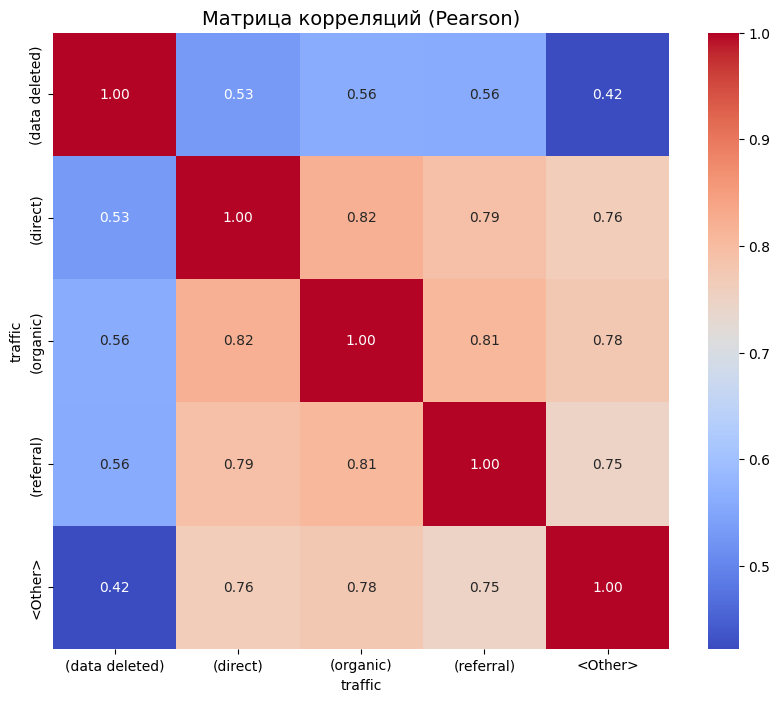

In [33]:
corr_matrix = df_agg_traffic.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

plt.title("Матрица корреляций (Pearson)", fontsize=14)
plt.show()

In [ ]:
df_agg_categ = df.groupby(["category", pd.Grouper(key="date", freq="D")])["price"].sum().unstack(level=0)

# Вибір топ-5 категорій
top_category = ["Sofas & armchairs", "Chairs", "Beds", "Bookcases & shelving units", "Cabinets & cupboards"]
df_filtered_categ = df_agg_categ[top_category].dropna()

correlation_matrix_categ = df_filtered_categ.corr(method="pearson")
correlation_matrix_categ

category,Sofas & armchairs,Chairs,Beds,Bookcases & shelving units,Cabinets & cupboards
category,,,,,
Sofas & armchairs,1.000000,0.578248,0.535378,0.666194,0.657563
Chairs,0.578248,1.000000,0.554500,0.637090,0.572870
Beds,0.535378,0.554500,1.000000,0.592913,0.514609
Bookcases & shelving units,0.666194,0.637090,0.592913,1.000000,0.539428
Cabinets & cupboards,0.657563,0.572870,0.514609,0.539428,1.000000


In [ ]:
df_agg_categ = df.groupby(["category", pd.Grouper(key="date", freq="D")])["price"].sum().unstack(level=0)

correlation_matrix_categ = df_agg_categ.corr(method="pearson")
correlation_matrix_categ

category,Bar furniture,Beds,Bookcases & shelving units,Cabinets & cupboards,Café furniture,Chairs,Chests of drawers & drawer units,Children's furniture,Nursery furniture,Outdoor furniture,Room dividers,"Sideboards, buffets & console tables",Sofas & armchairs,Tables & desks
category,,,,,,,,,,,,,,
Bar furniture,1.000000,0.297082,0.318036,0.242900,0.202134,0.257818,0.318205,0.249232,0.179177,0.422019,0.114125,0.051004,0.361399,0.229169
Beds,0.297082,1.000000,0.592913,0.514609,0.341617,0.554500,0.421364,0.404879,0.081208,0.463944,0.021976,0.212012,0.535378,0.546146
Bookcases & shelving units,0.318036,0.592913,1.000000,0.539428,0.389763,0.637090,0.538974,0.403130,0.120822,0.633927,0.042460,0.211358,0.666194,0.516978
Cabinets & cupboards,0.242900,0.514609,0.539428,1.000000,0.316997,0.572870,0.392273,0.505149,0.274400,0.432335,0.113299,0.275435,0.657563,0.503416
Café furniture,0.202134,0.341617,0.389763,0.316997,1.000000,0.398924,0.301459,0.281969,0.033271,0.423377,0.174326,0.204553,0.366394,0.267174
Chairs,0.257818,0.554500,0.637090,0.572870,0.398924,1.000000,0.368113,0.392198,0.234208,0.426934,0.027921,0.140584,0.578248,0.531388
Chests of drawers & drawer units,0.318205,0.421364,0.538974,0.392273,0.301459,0.368113,1.000000,0.519834,0.053684,0.499384,-0.120493,0.290178,0.530962,0.457071
Children's furniture,0.249232,0.404879,0.403130,0.505149,0.281969,0.392198,0.519834,1.000000,0.087039,0.375469,0.117491,0.372284,0.536807,0.519111
Nursery furniture,0.179177,0.081208,0.120822,0.274400,0.033271,0.234208,0.053684,0.087039,1.000000,0.143353,0.053248,0.048426,0.144099,0.201112


In [ ]:
df_agg_device = df.groupby(["device", pd.Grouper(key="date", freq="D")])["price"].sum().unstack(level=0)

correlation_matrix_device = df_agg_device.corr(method="pearson")
correlation_matrix_device

device,desktop,mobile,tablet
device,,,
desktop,1.000000,0.873201,0.601354
mobile,0.873201,1.000000,0.567394
tablet,0.601354,0.567394,1.000000


In [ ]:
for device1 in df_agg_device:
    for device2 in df_agg_device:
        if device1 < device2:
            corr, p_value = pearsonr(df_agg_device[device1], df_agg_device[device2])
            print(f"Кореляція між {device1} та {device2}:")
            print(f"  Коефіцієнт кореляції: {corr}")
            print(f"  p-value: {p_value}")

Кореляція між desktop та mobile:
  Коефіцієнт кореляції: 0.8732005616757477
  p-value: 7.719910860665552e-30
Кореляція між desktop та tablet:
  Коефіцієнт кореляції: 0.6013535147282096
  p-value: 2.3168062296392482e-10
Кореляція між mobile та tablet:
  Коефіцієнт кореляції: 0.567393838838939
  p-value: 3.6938169231464336e-09


#Статистичний аналіз відмінностей між групами.


In [ ]:
df["id_account"] = df["id_account"].fillna(0).astype(int)
#Вибірка з незареєстрованих акаунтів
unregistered_account= df[df["id_account"] == 0]
unregistered_account_date_price = unregistered_account.groupby(["date"])["price"].sum().reset_index()
unregistered_account_date_price

,date,price
0,2020-11-01,222745.5
1,2020-11-02,310550.0
2,2020-11-03,469829.1
3,2020-11-04,318204.9
4,2020-11-05,365942.0
...,...,...
87,2021-01-27,271727.1
88,2021-01-28,0.0
89,2021-01-29,0.0
90,2021-01-30,0.0


In [ ]:
#Вибірка з раеєстрованих акаунтів
registered_account= df[df["id_account"] != 0]
registered_account_date_price = registered_account.groupby(["date"])["price"].sum().reset_index()
registered_account_date_price

,date,price
0,2020-11-01,21547.0
1,2020-11-02,44956.8
2,2020-11-03,29150.5
3,2020-11-04,20982.2
4,2020-11-05,25334.6
...,...,...
83,2021-01-23,16117.0
84,2021-01-24,20914.0
85,2021-01-25,34163.8
86,2021-01-26,27213.6


Shapiro-Wilk for normal data p-value: 0.007295139880540744
Shapiro-Wilk for non-normal data p-value: 0.007295139880540744


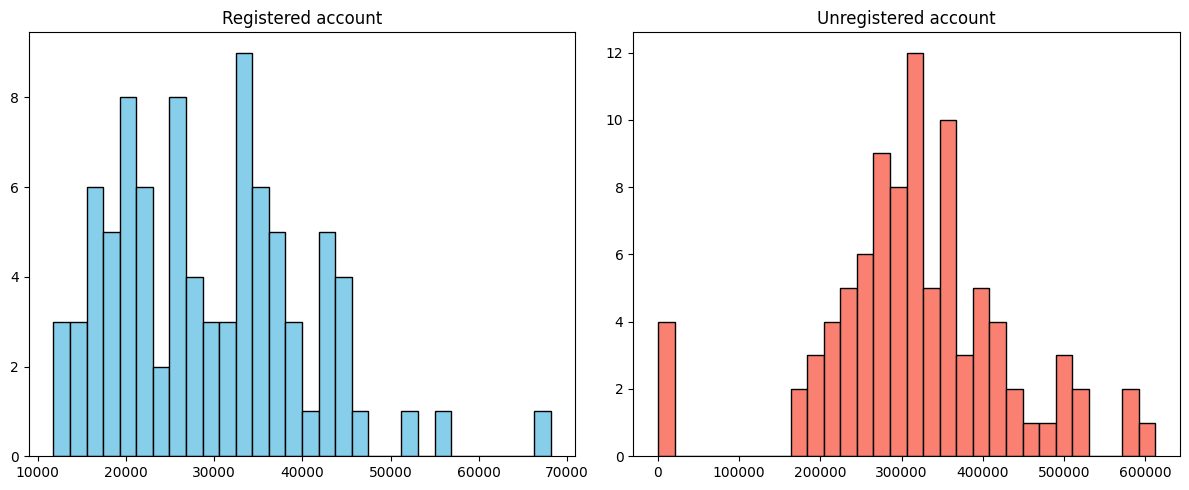

In [ ]:
from scipy.stats import normaltest, shapiro
#Проводимо тест на визначення нормального розподілу для реєстрованих користувачів та нереєстрованих
_, p_value_shapiro_normal = shapiro(registered_account_date_price["price"])
_, p_value_shapiro_non_normal = shapiro(registered_account_date_price["price"])

print(f"Shapiro-Wilk for normal data p-value: {p_value_shapiro_normal}")
print(f"Shapiro-Wilk for non-normal data p-value: {p_value_shapiro_non_normal}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(registered_account_date_price["price"], bins=30, color="skyblue", edgecolor="black")
plt.title("Registered account")

plt.subplot(1, 2, 2)
plt.hist(unregistered_account_date_price["price"], bins=30, color="salmon", edgecolor="black")
plt.title("Unregistered account")

plt.tight_layout()
plt.show()

In [ ]:
#Проводимо тест Манна Уїтні для порівняння вибірок та знаходження
from scipy.stats import mannwhitneyu

u_stat, p_value = mannwhitneyu(registered_account_date_price["price"], unregistered_account_date_price["price"])

print(f"U-statistic: {u_stat}, p-value: {p_value}")

U-statistic: 352.0, p-value: 3.8805185465235906e-26


In [ ]:
from scipy.stats import f_oneway

data_deleted = df[df["traffic"] == "(data deleted)"]["ga_session_id"]
organic = df[df["traffic"] == "(organic)"]["ga_session_id"]
direct = df[df["traffic"] == "(direct)"]["ga_session_id"]
referral = df[df["traffic"] == "(referral)"]["ga_session_id"]
other = df[df["traffic"] == "<Other>"]["ga_session_id"]

#Проводимо тест ANOVA
f_stat, p_value = f_oneway(data_deleted, organic, direct, referral, other)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")


F-statistic: 1.628556701744514
P-value: 0.16389882106923703


In [ ]:
import statsmodels.api as sm

total_sessions_europe = len(df[df["continent"] == "Europe"])
organic_sessions_europe = len(df[(df["continent"] == "Europe") & (df["traffic"] == "(organic)")])

total_sessions_america = len(df[df["continent"] == "Americas"])
organic_sessions_america = len(df[(df["continent"] == "Americas") & (df["traffic"] == "(organic)")])

#Проведення Z-тесту
z_statistic, p_value = sm.stats.proportions_ztest([organic_sessions_europe, organic_sessions_america], [total_sessions_europe, total_sessions_america])

print(f"Дані для Європи: {organic_sessions_europe} органічних сесій із {total_sessions_europe} загальних.")
print(f"Дані для Америки: {organic_sessions_america} органічних сесій із {total_sessions_america} загальних.")
print(f"Z-statistic: {z_statistic}")
print(f"p-value: {p_value}")

Дані для Європи: 22190 органічних сесій із 65135 загальних.
Дані для Америки: 65783 органічних сесій із 193179 загальних.
Z-statistic: 0.06907726418476848
p-value: 0.9449281183430579


In [ ]:
# Зберігаємо результати в CSV файл
df.to_csv("data_price.csv", index=False)
from google.colab import files
files.download("data_price.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>